# Trees In Pittsburgh
###  By: Anna Cavanaugh

One metric for determining the most aesthetically pleasing neighborhood is the greenest neighoborhood, or the neighborhood with the most trees. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First, lets read the dataset into the notebook.

In [2]:
trees = pd.read_csv("trees.csv", low_memory = False)
# setting the id to 1, so that it can be totaled further down.
trees.iloc[:,0] =1

FileNotFoundError: [Errno 2] No such file or directory: 'trees.csv'

Next, lets find the total number of trees in each neighborhood.

In [142]:
values = trees.groupby('neighborhood').sum()['id']
values = values.sort_values(ascending=False)
values

neighborhood
Squirrel Hill South    5073
Highland Park          2941
Squirrel Hill North    2083
South Side Flats       1693
Shadyside              1558
                       ... 
Arlington Heights         5
Esplen                    3
Glen Hazel                2
South Shore               2
Hays                      1
Name: id, Length: 90, dtype: int64

Now, lets plot the top 5 neighborhoods on a bar graph.

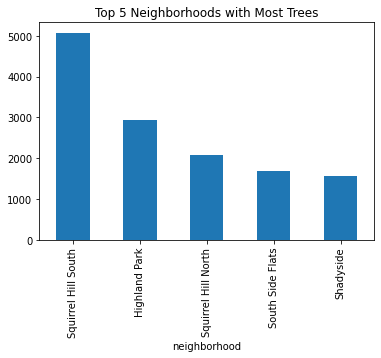

In [143]:
valueshigh = values.head(5)
valueshigh.plot.bar(x = values[0], y = values[1], title = "Top 5 Neighborhoods with Most Trees")

This is boring though, so lets plot the data on a map to see it in another form.

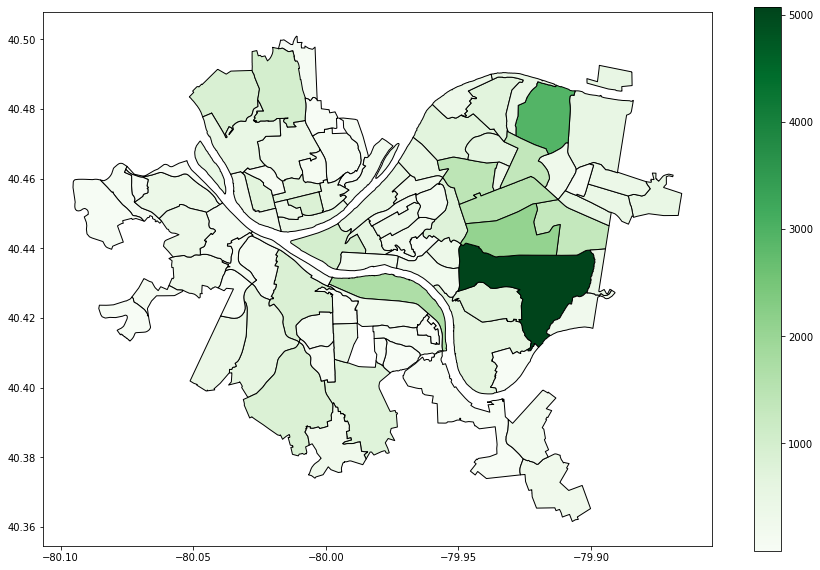

In [160]:
import geopandas 
import shapely
#create map of pittsburgh neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#feed tree data into map
mapn = neighborhoods.merge(values, how = 'left',left_on = 'hood', right_on = 'neighborhood')
mapn.plot(column = 'id',cmap = 'Greens', edgecolor ='black',figsize = (15,10), legend = True)

This is good, but what if we could see where every tree in Pittsburgh actually is.

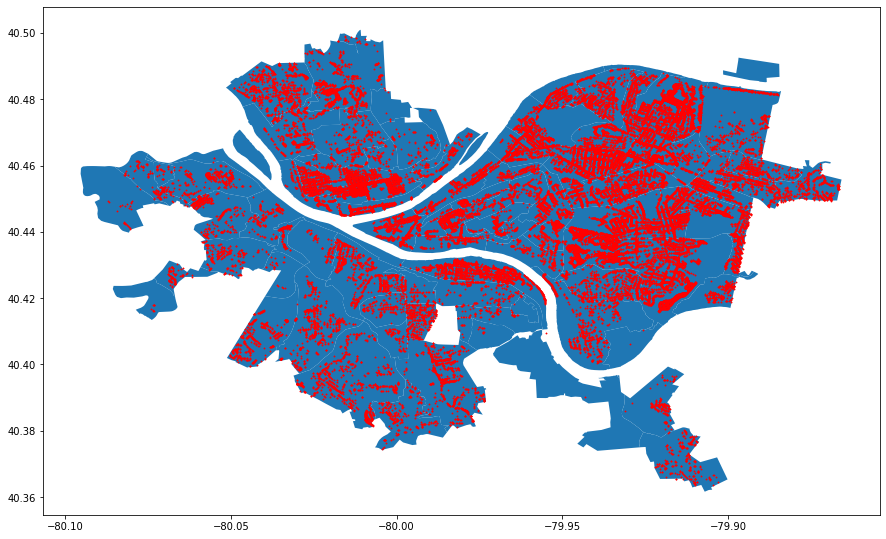

In [164]:
geometry = [Point(xy) for xy in zip(trees['longitude'],trees['latitude'])]
gdf = GeoDataFrame(trees, geometry = geometry)
g =gdf.plot(ax = neighborhoods.plot(figsize=(15,15)),marker = '*', color ='red', markersize = 1)
plt.show()

We have a map of all the trees in pittsburgh, but its still difficult to see the underlying neighborhoods, so lets fix it.

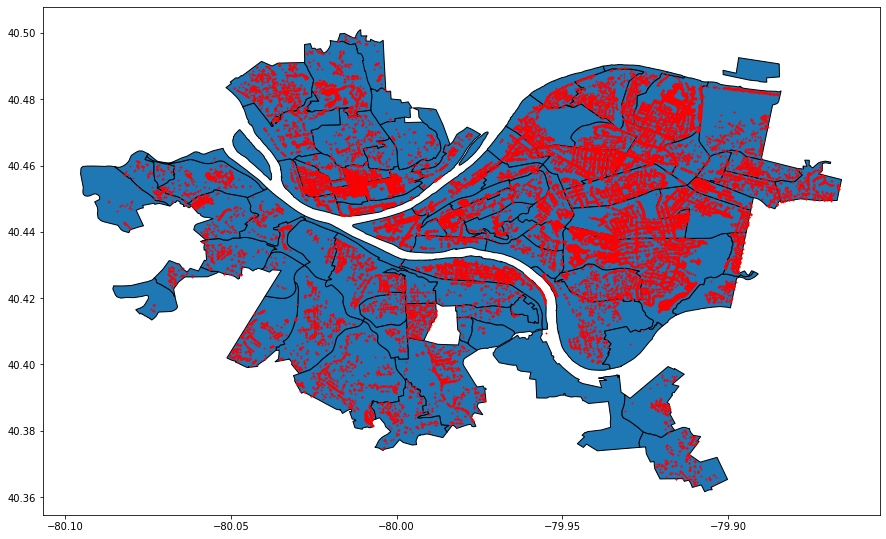

In [169]:
g =gdf.plot(ax = neighborhoods.plot(figsize=(15,15), edgecolor = 'black'),marker = '*', color ='red', markersize = 1)

# The Best Neighborhood

According to our tree data, **Squirrell Hill South** is the "prettiest" neighborhood in Pittsburgh without accounting for other metrics.